In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score, auc, roc_curve

%matplotlib inline

data = pd.read_csv('diabetes_data.csv')


X = data
X = X.drop(columns='Class')


Y = [0 if x == 'negative' else 1 for x in data['Class']]

data.head(20)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive
5,5,116,74,0,0,25.6,0.201,30,negative
6,3,78,50,32,88,31.0,0.248,26,positive
7,10,115,0,0,0,35.3,0.134,29,negative
8,2,197,70,45,543,30.5,0.158,53,positive
9,8,125,96,0,0,0.0,0.232,54,positive


In [3]:
# Let's check if there are any null values
data.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class                           0
dtype: int64

In [4]:
# let's split data to train and test data
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, train_size = 0.80)


/home/teemu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# Let's build our model
model = GaussianNB()
model.fit(X_train, Y_train)
predicts = model.predict(X_val)


In [6]:
rauc = roc_auc_score(Y_val, predicts)
print(rauc)

0.6886850152905198


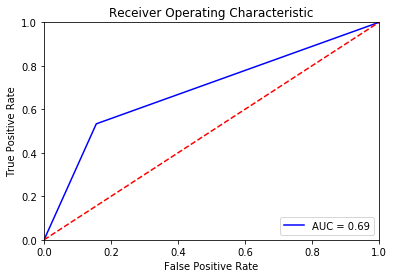

In [7]:
probs = model.predict(X_val)
preds = probs
fpr, tpr, threshold = roc_curve(Y_val, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
model.score(X_val, Y_val)

0.7532467532467533

In [9]:

cm = confusion_matrix(Y_val, predicts)
print(cm)

[[92 17]
 [21 24]]


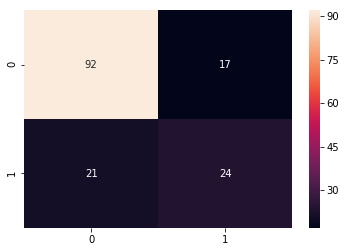

In [10]:

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [14]:
import xgboost as xgb
xgmodel = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
xgmodel = xgmodel.fit(X_train, Y_train)
xgpreds = xgmodel.predict(X_val)

/home/teemu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
from sklearn.metrics import accuracy_score

print("Accuracy for xgmodel %.2f" % (accuracy_score(Y_val, xgpreds) * 100))

Accuracy for xgmodel 76.62


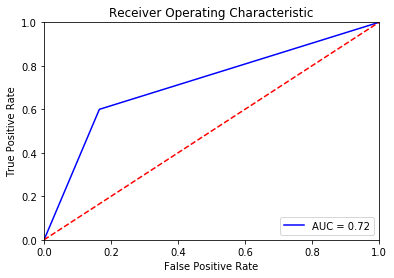

In [16]:

fpr, tpr, threshold = roc_curve(Y_val, xgpreds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()